Importing required libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
from collections import Counter
import re
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/spam.csv', encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

Renaming column names

In [8]:
data.rename(columns = {"v1":"Type","v2":"Mail"},inplace = True)

In [9]:
data

,Type,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data.duplicated().sum()

403

Deleting duplicated rows to increase consistency

In [11]:
data.drop_duplicates(keep = 'first',inplace = True)
data.shape

(5169, 2)

In [12]:
data.fillna(' ', inplace=True)

In [13]:
data.head()

,Type,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.tail()

,Type,Mail
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


Exploratory data analysis

In [15]:
all_text = ' '.join(data['Mail'])
words = re.findall(r'\w+', all_text.lower())
word_count = Counter(words)
word_count_df = pd.DataFrame(word_count.items(), columns=['Word', 'Count'])
sorted_word_count_df = word_count_df.sort_values(by='Count', ascending=False)
top_words = sorted_word_count_df.head(10)
print(top_words)

    Word  Count
61     i   2832
87   you   2143
32    to   2070
29     a   1293
156  the   1234
24     u   1062
79   and    929
7     in    826
102   is    793
106   me    753


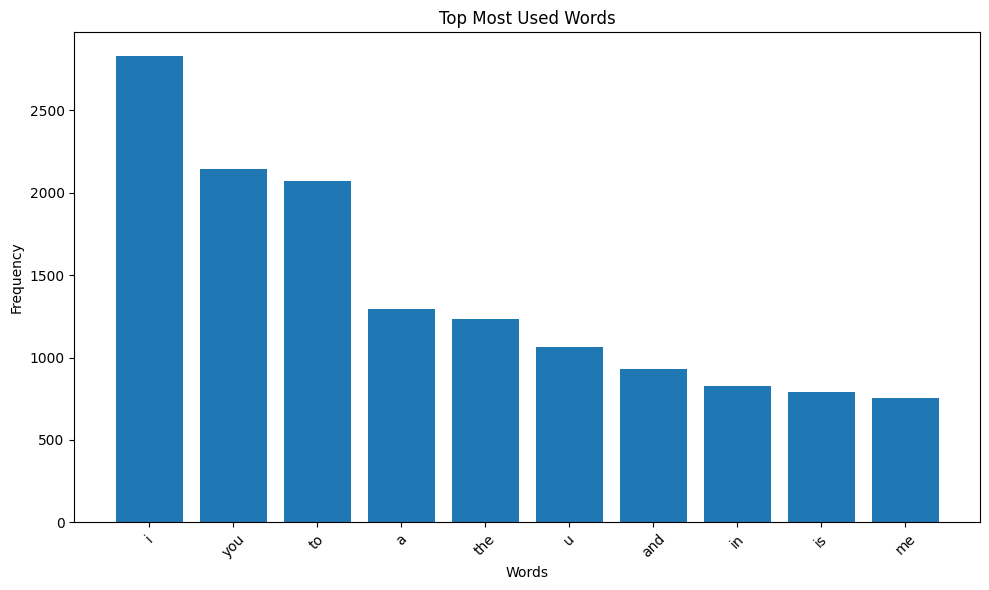

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(top_words['Word'], top_words['Count'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Most Used Words')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [17]:
data.describe()

,Type,Mail
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


Converting type column into numerical

In [18]:
def converter(value):
    if value == 'spam':
        return 0
    else:
        return 1

In [19]:
data['Type'] = data['Type'].apply(converter)

In [20]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)

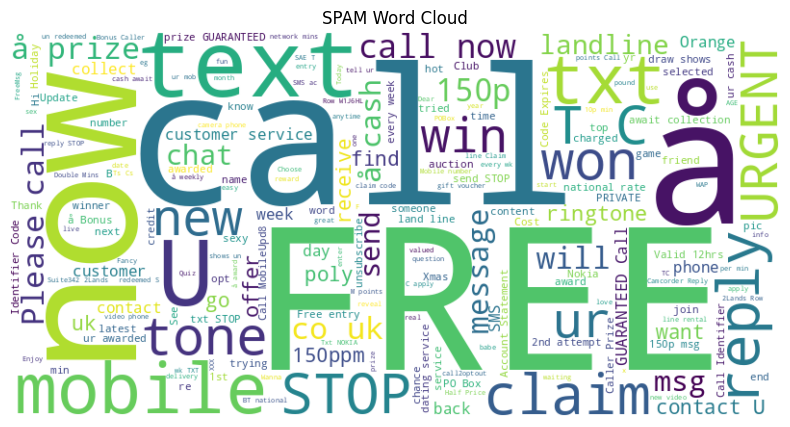

In [21]:
spam_text = data[data["Type"] == 0]["Mail"].str.cat(sep=" ")
spam_wc = WordCloud(width=800, height=400, background_color="white").generate(spam_text)

# SPAM Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.title("SPAM Word Cloud")
plt.show()

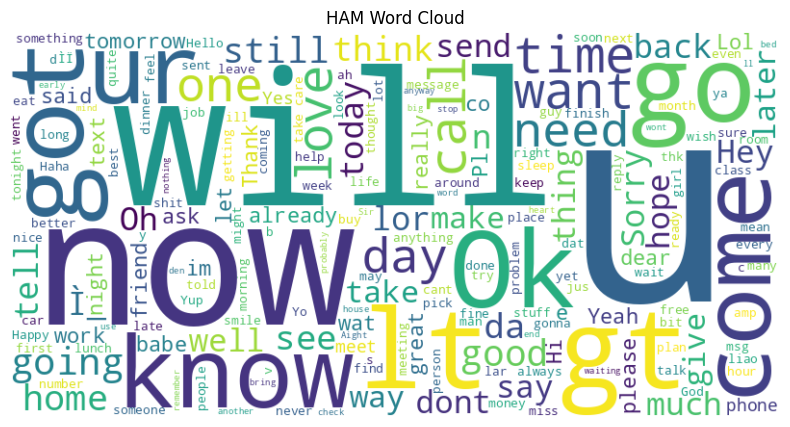

In [22]:
ham_text = data[data["Type"] == 1]["Mail"].str.cat(sep=" ")
ham_wc = WordCloud(width=800, height=400, background_color="white").generate(ham_text)

# HAM Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.title("HAM Word Cloud")
plt.show()

Training and building the model

In [23]:
X=data['Mail']
y=data['Type']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Text data, which is essentially a collection of words or characters, needs to be transformed into a numerical format that machine learning algorithms can understand and process. Using Vectorizer to transform object data into numerical format.

In [26]:
vectorizer = TfidfVectorizer()
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

KNeighbors

In [35]:
model = KNeighborsClassifier(n_neighbors=150)
model.fit(X_train_v, y_train)

KNeighborsClassifier(n_neighbors=150)

In [36]:
y_pred = model.predict(X_test_v)

Model 1 evaluation

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61       145
           1       0.92      1.00      0.96       889

    accuracy                           0.92      1034
   macro avg       0.96      0.72      0.78      1034
weighted avg       0.93      0.92      0.91      1034



In [38]:
print(accuracy_score(y_test, y_pred))

0.9216634429400387


Multinomial Naive Bayes

In [40]:
model2 = MultinomialNB()
model2.fit(X_train_v, y_train)

MultinomialNB()

In [44]:
y_pred2 = model2.predict(X_test_v)

Model 2 Evaluation

In [45]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       145
           1       0.95      1.00      0.97       889

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034



In [46]:
print(accuracy_score(y_test, y_pred2))

0.9555125725338491


Using model 2 which has higher accuracy than model 1 for testing

In [49]:
mail = ["Congrats! You have won! Click the link below to claim your prize now!"]
features = vectorizer.transform(mail)
prediction = model2.predict(features)

if (prediction)[0] == 1:
  print("Not spam")
else:
  print("Spam mail")

Spam mail


In [50]:
mail = ["Hi, left the key at the door, will be back soon"]
features = vectorizer.transform(mail)
prediction = model2.predict(features)

if (prediction)[0] == 1:
  print("Not spam")
else:
  print("Spam mail")

Not spam
